<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:150%; text-align:left">
<h3 align="center"><font color='#DEB887'>Medical Insurance Price Prediction Model </font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

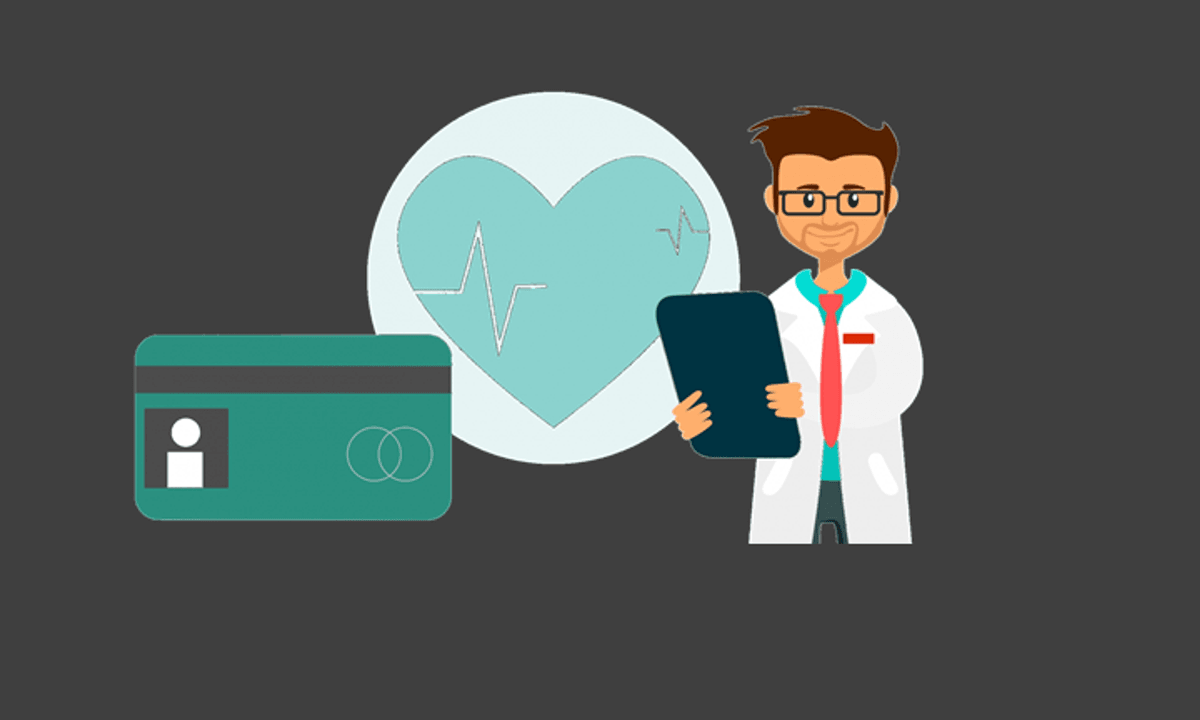

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          color:black;
          font-size:150%;
          text-align:center;">
Goal of  Model 
    <p style="padding: 9px;
              color:black;
              font-size:90%;
              text-align: center;">
     To Predict Price of Medical Insurance 
   
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Source of Data : Kaggle
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Work Flow:
</p>
</div>

- Step 1: Importing the required libraries
- Step 2: Loading the DataSet
- Step 3: Basic Understanding of Data
- Step 4: Data Preprocessing
- Step 5: Exploratory Data Analysis (EDA) along with Insights
- Step 6: Model Building, Training and Deploying by AWS SageMaker 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 1: Importing the Required Libraries
</p>
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 2: Loading the Data set
</p>
</div>

In [3]:
df=pd.read_csv('insurance.csv')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 3: Basic Understanding of Data
</p>
</div>

### Preview of Data

In [4]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
603,64,female,39.050,3,no,southeast,16085.1275
338,50,male,32.300,1,yes,northeast,41919.0970
128,32,female,17.765,2,yes,northwest,32734.1863


### How big is the Data

In [5]:
df.shape

(1338, 7)

**Observation**:
- This Dataset has 1338 rows and 7 columns 

### Basic information of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observation** :

4 Features or Columns are Numeric types (float and int)

3 Features or Columns are Object types

### Fetching column names

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#####  Columns Description

- sex: insurance contractor gender, female, male

- bmi: Body mass index (ideally 18.5 to 24.9)

- children: Number of children covered by health insurance / Number of dependents

- smoker: smoking habits

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 4: Data Preprocessing 
</p>
</div>

### Detection of Missing values

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observation** : 

There is no Missing Values in the data

### Detection of Duplicate Values

In [9]:
df.duplicated().sum()


1

**Observation** :

There is 1 Duplicated Values in the data, so we will remove it

In [10]:
df.drop_duplicates(inplace=True) #dropping the duplicate values

In [11]:
df.duplicated().sum() #verify the duplicate values

0

### Checking the inconsistency or invalid value  in the columns

**First seggregating the data into object and numeric types and check the inconsitency accordingly**

**For Object types Features/Columns**

In [12]:
df_obj=df.select_dtypes(include="object")
for i in df_obj:
    print(i,"------------",df[i].unique(),"has",df[i].nunique(),"values","\n\n")

sex ------------ ['female' 'male'] has 2 values 


smoker ------------ ['yes' 'no'] has 2 values 


region ------------ ['southwest' 'southeast' 'northwest' 'northeast'] has 4 values 




**For Numeric types Features/Columns**

In [13]:
df_num=df.select_dtypes(exclude="object")
for i in df_num:
    print(i,"------------",df[i].unique(),"has",df[i].nunique(),"values","\n\n")

age ------------ [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] has 47 values 


bmi ------------ [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28

**Observation** :

There is no Invalid Values in the data

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 5: Exploratory Data Analysis
</p>
</div>

In [14]:
df.describe() #It tells Statical summary of data

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


**Conclusion**

- The age of the policyholders ranges from 18 to 64 years, with an average age of 39.
- The BMI ranges from 15.96 to 53.13, with an average of 30.66, which is within the overweight range.
- The number of children ranges from 0 to 5.
- The insurance charges vary significantly, ranging from $1121 to  $63,770, with a mean of $13,279.

In [15]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


### Univariate/Bivariate Analysis

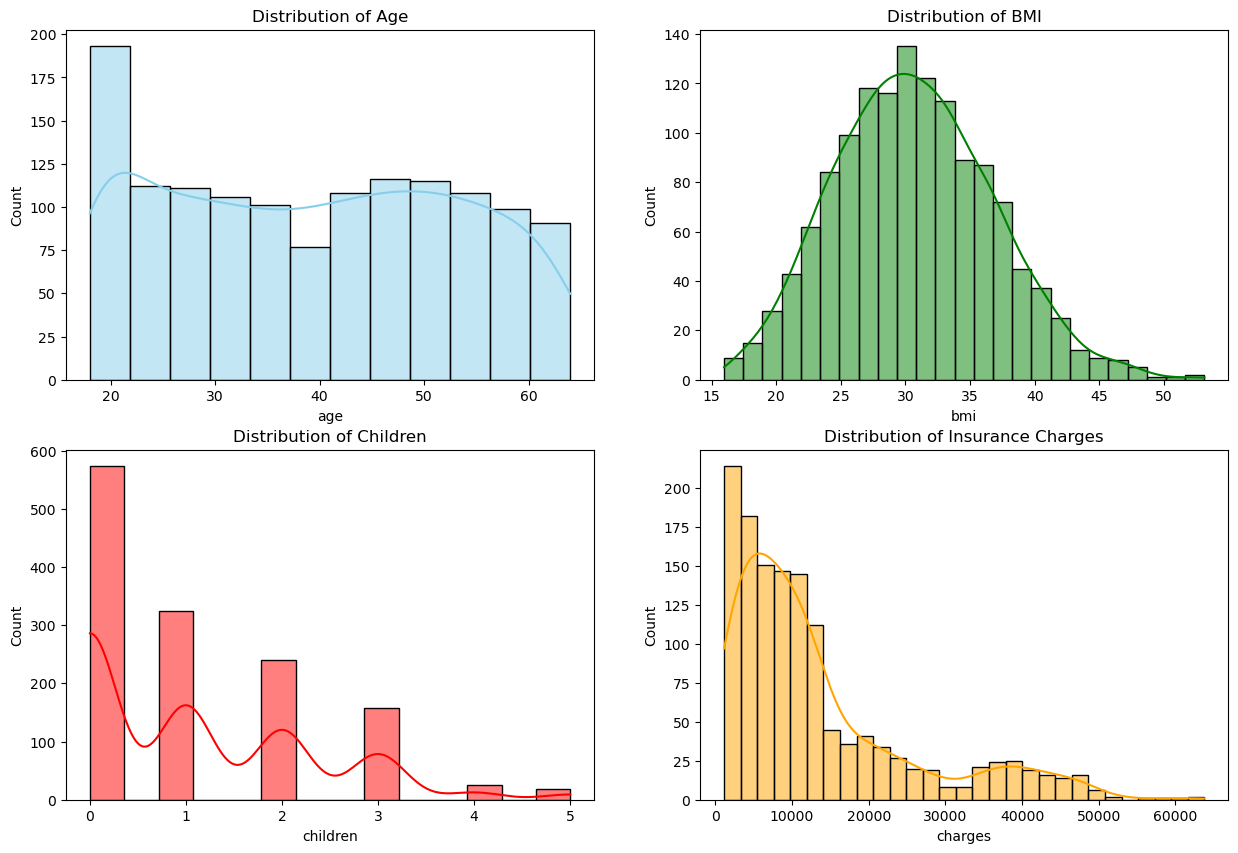

In [16]:
# Plotting histograms for numerical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True, color='green')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 3)
sns.histplot(df['children'], kde=True, color='red')
plt.title('Distribution of Children')

plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True, color='orange')
plt.title('Distribution of Insurance Charges');



**Observation**

- The age distribution is fairly uniform across the age range, with no significant skew.
- The BMI distribution shows a slight right skew, indicating a larger number of people with higher BMI.
- Most individuals have 0 to 2 children.
- The charges are highly right-skewed, with a few individuals having extremely high insurance costs.

/tmp/ipykernel_51/1583999155.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=df, palette='Set2')
/tmp/ipykernel_51/1583999155.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='Set3')


Text(0.5, 1.0, 'Charges by Region')

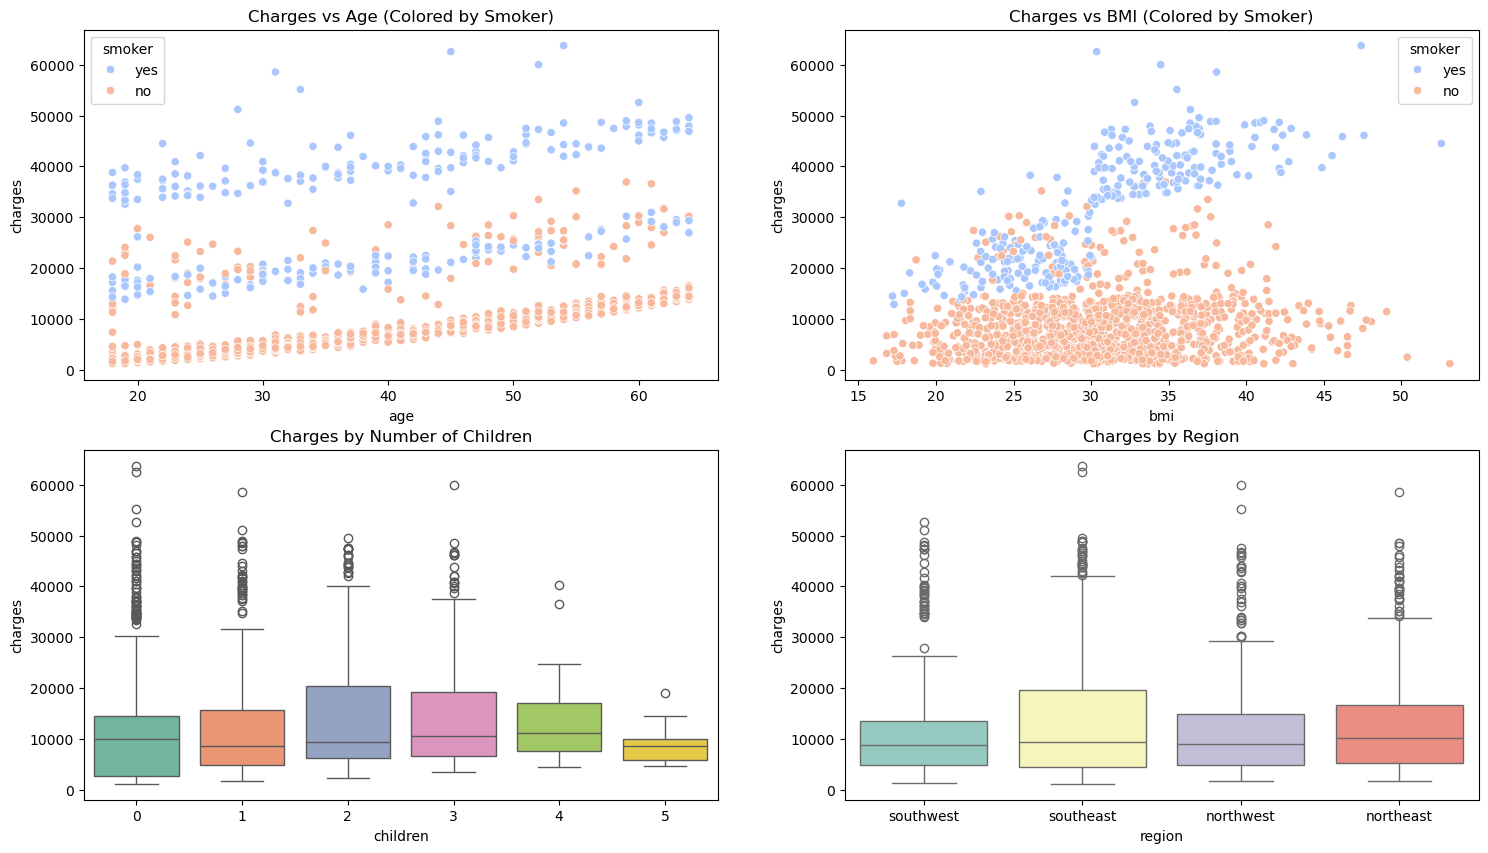

In [17]:

plt.figure(figsize=(18, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Charges vs Age (Colored by Smoker)')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Charges vs BMI (Colored by Smoker)')

plt.subplot(2, 2, 3)
sns.boxplot(x='children', y='charges', data=df, palette='Set2')
plt.title('Charges by Number of Children')


plt.subplot(2, 2, 4)
sns.boxplot(x='region', y='charges', data=df, palette='Set3')
plt.title('Charges by Region')



**Observation**

- Charges vs Age: Older individuals, especially smokers, tend to have higher insurance costs.
- Charges vs BMI: Higher BMI values are associated with increased costs, particularly for smokers.
- Charges by Children: There is little variation in charges based on the number of children.
- Charges by Region: No major differences in charges across regions.

In [18]:
df_num=df.select_dtypes(exclude="object")

In [19]:
# Correlation Matrix to check relationships between numerical features
correlation_matrix = df_num.corr()
correlation_matrix 


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


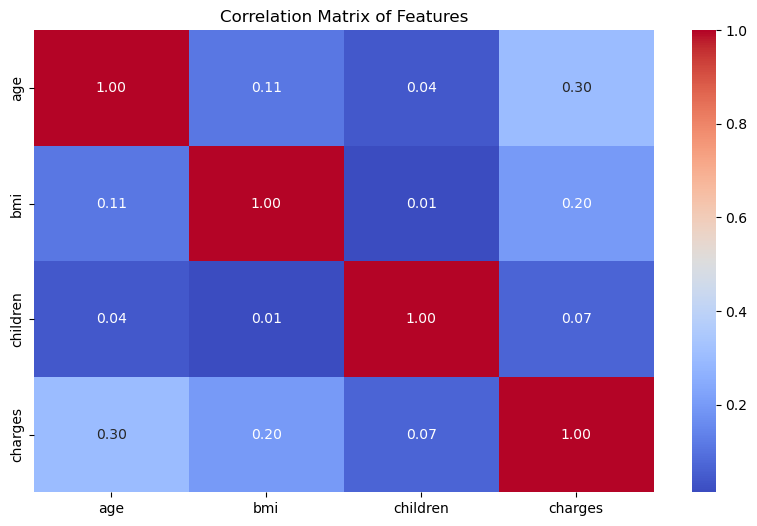

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

**Conclusion**

- Age and charges have a moderate positive correlation (0.30), means older people tend to have higher medical expenses.-
- BMI also shows a small positive correlation with charges (0.20).
- The number of children has almost no correlation with charges (0.07).

In [21]:
# Check unique values in the 'sex' column
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [22]:
# convert categorical variable to numerical

df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [23]:
df.head(2) #verify the sex column

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523


In [24]:
# Check the unique values in the 'smoker' column
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
# Convert categorical variable to numerical 

df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [26]:
df.head(2) #verify the smoker column

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [27]:
# Check unique values in 'region' column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
df=pd.get_dummies(drop_first=True,columns=["region"],data=df)

In [29]:
df.head(2)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,False,False,True
1,18,1,33.77,1,0,1725.5523,False,True,False


In [30]:
df.replace({True: 1, False: 0},inplace=True)

/tmp/ipykernel_51/9951749.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1, False: 0},inplace=True)


In [31]:
df.head(2)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,1
1,18,1,33.77,1,0,1725.5523,0,1,0


## Conclusions from EDA:

- Smoking has a significant impact on medical charges, with smokers incurring far higher costs than non-smokers.
- Both age and BMI positively affect medical charges, but smoking amplifies these effects significantly.
- The number of children and region don't seem to influence insurance charges much.

#### Dividing Data into feature (x) and Target (y)

In [32]:
x = df.drop(columns =['charges'])
y = df['charges']


In [33]:
x

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [34]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [35]:
x.shape

(1337, 8)

In [36]:
y.shape

(1337,)

In [37]:
x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

In [38]:
y = y.reshape(-1,1)

In [39]:
x

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [40]:
scaler_x=StandardScaler()     #Feature Scalling
x=scaler_x.fit_transform(x)

scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [41]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
x_train.shape

(1069, 8)

In [43]:
x_test.shape

(268, 8)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 7: Model Building, Training and Deployment by AWS SageMaker 
</p>
</div>

### Step 1: Importing Libraries, Set up SageMaker and AWS Resources(S3 for storage, IAM roles for permissions)

In [87]:
import sagemaker
import boto3

sagemaker_session=sagemaker.Session()

bucket="sagemaker-projects123"
prefix="linear_learner123"

role=sagemaker.get_execution_role()
print(role)


arn:aws:iam::339712904536:role/service-role/AmazonSageMaker-ExecutionRole-20241017T211932


### Step 2: Preparing Data for SageMaker in RecordIO format

In [88]:
x_train.shape

(1069, 8)

In [89]:
x_test.shape

(268, 8)

In [90]:
# y_train= y_train[:,0]

In [91]:
y_train.shape

(1069,)

In [92]:
import io
import numpy as np
import sagemaker.amazon.common as smac #sagemaker common library

buf=io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, x_train,y_train)
buf.seek(0)

0

### Step 3: Uploading Training Data to S3 (Simple Storage Service)

In [93]:
import os
import boto3

# Assuming 'bucket' and 'prefix' are defined earlier in your code
bucket = 'sagemaker-projects123'
prefix = 'linear_learner'  # Ensure there's no trailing slash

# Key refers to the name of the file    
key = 'linear-train-data'

# Uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in S3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))


uploaded training data location: s3://sagemaker-projects123/linear_learner/train/linear-train-data


### Step 4: Create Ouput Placeholder in S3 (Simple Storage Service) to store Trained Model

In [94]:
output_location ="s3://{}/{}/ouput".format(bucket,prefix)   #ouput placeholder in S3 bucket to store the linear Learner Ouput
print("Training artifacts will be uploaded to: {}".format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-projects123/linear_learner/ouput


### Step 5: Get the Pre-Built Model Container for Linear Learner

In [95]:
from sagemaker.amazon.amazon_estimator import get_image_uri    #Used to get the training container of sagemaker built-in algorithm

container =get_image_uri(boto3.Session().region_name,"linear-learner")

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


### Step 6: Define and Run the Training Job with Hyperparameters

In [96]:
linear=sagemaker.estimator.Estimator(container,
                                     role,
                                     train_instance_count=1,
                                     train_instance_type="ml.c4.xlarge",
                                     output_path = output_location,
                                     sagemaker_session=sagemaker_session)

linear.set_hyperparameters(feature_dim=8,                              #HyperparameterTuning
                          predictor_type="regressor",   
                          mini_batch_size=100,
                          epochs=100,
                          num_models=32,
                          loss="absolute_loss")

linear.fit({"train":s3_train_data})


See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-10-19-14-44-37-356


2024-10-19 14:44:37 Starting - Starting the training job...
2024-10-19 14:44:52 Starting - Preparing the instances for training...
2024-10-19 14:45:16 Downloading - Downloading input data...
2024-10-19 14:45:46 Downloading - Downloading the training image.........
2024-10-19 14:47:38 Training - Training image download completed. Training in progress.
2024-10-19 14:47:38 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[10/19/2024 14:47:27 INFO 139727449683776] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'in

### Step 7: Deploy the Trained Model for Predictions

In [97]:
# Deploying the model to perform inference

linear_regressor= linear.deploy(initial_instance_count=1,instance_type="ml.m4.xlarge")

INFO:sagemaker:Creating model with name: linear-learner-2024-10-19-14-55-50-517
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-10-19-14-55-50-517
INFO:sagemaker:Creating endpoint with name linear-learner-2024-10-19-14-55-50-517


--------!

### Step 8: Set Up Input and Output Data Format for Predictions


In [103]:
from sagemaker.serializers import CSVSerializer  # Import CSVSerializer to format input data as CSV
from sagemaker.deserializers import JSONDeserializer  # Import JSONDeserializer to parse response data as JSON

# Set the serializer for the linear_regressor to convert input data to CSV format
linear_regressor.serializer = CSVSerializer()  
# Set the deserializer for the linear_regressor to interpret response data as JSON
linear_regressor.deserializer = JSONDeserializer()  


In [104]:
x_test.shape

(268, 8)

### Step 9: Make Predictions Using the Deployed Model

In [105]:
# making prediction on the test data

result=linear_regressor.predict(x_test)

In [106]:
result #prediction comes from the model

{'predictions': [{'score': -0.34791526198387146},
  {'score': -0.6646720170974731},
  {'score': -0.16152390837669373},
  {'score': 0.7494566440582275},
  {'score': -0.682584285736084},
  {'score': -0.2934616506099701},
  {'score': 0.6018891334533691},
  {'score': -0.9471087455749512},
  {'score': -0.42971235513687134},
  {'score': -0.25699669122695923},
  {'score': -0.08065520226955414},
  {'score': 1.0921014547348022},
  {'score': 0.7266992330551147},
  {'score': -0.045152828097343445},
  {'score': -0.5156621932983398},
  {'score': -0.4025382101535797},
  {'score': -0.9662617444992065},
  {'score': 0.768268346786499},
  {'score': -0.8294291496276855},
  {'score': -0.7507081031799316},
  {'score': -0.9688384532928467},
  {'score': 0.7984355688095093},
  {'score': -0.2483692169189453},
  {'score': 0.8166525363922119},
  {'score': 0.7320951223373413},
  {'score': -0.8532209396362305},
  {'score': 0.9755268096923828},
  {'score': 1.2540240287780762},
  {'score': -0.26273250579833984},
  {

In [107]:
# Since the result  is in the jason format, we access the scores by iterating through the scores in the prediction

predictions=np.array([r["score"]for r in result ["predictions"]])

In [108]:
predictions

array([-0.34791526, -0.66467202, -0.16152391,  0.74945664, -0.68258429,
       -0.29346165,  0.60188913, -0.94710875, -0.42971236, -0.25699669,
       -0.0806552 ,  1.09210145,  0.72669923, -0.04515283, -0.51566219,
       -0.40253821, -0.96626174,  0.76826835, -0.82942915, -0.7507081 ,
       -0.96883845,  0.79843557, -0.24836922,  0.81665254,  0.73209512,
       -0.85322094,  0.97552681,  1.25402403, -0.26273251, -0.20731661,
       -0.68513536, -0.30456859, -1.038059  , -0.13295114,  1.19239819,
       -0.25769973, -0.84235144, -0.66306621,  1.06742406, -0.38513437,
       -0.85708737,  0.99162436,  0.98594248, -0.24609908, -0.34670812,
       -0.81251621, -0.94279778, -0.44342178, -0.75358403, -0.52505583,
       -0.73151076, -0.51056451,  0.97419786, -0.99894881, -0.44845098,
       -0.42079496, -0.2585206 , -0.82815349,  0.70451331, -0.45748928,
       -0.18834636, -0.60761654, -0.18411258, -1.01236558, -0.14402749,
       -0.1632185 , -0.51592422,  0.87063527,  0.34833655,  0.03

In [109]:
predictions.shape

(268,)

In [111]:
# Reshape predictions and y_test to be 2D arrays
y_predict_orig = scaler_y.inverse_transform(predictions.reshape(-1, 1))  # Reshape to (n_samples, 1)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Reshape to (n_samples, 1)


### Step 10: Evaluate Model Performance and Clean Up Resources

In [114]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Number of observations and features
n = len(y_test_orig)  # Total number of observations in the test set

# Check if predictions is 1D or 2D and set k accordingly
if len(predictions.shape) == 1:  # 1D array
    k = 1  # Only one feature
else:  # 2D array
    k = predictions.shape[1]  # Number of independent variables (features) used in your model

# Calculate performance metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print the results
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 8208.202 
MSE = 67374574.31887278 
MAE = 4122.781652270439 
R2 = 0.6333477478693795 
Adjusted R2 = 0.6319693559440764


In [115]:
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-10-19-14-55-50-517
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-10-19-14-55-50-517
